# 1. Dataset Overview

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.
<br></br>
- age : age of customer (numeric)
<br></br>
- job : type of job (categorical)
<br></br>
- marital : marital status (categorical)
<br></br>
- education (categorical)
<br></br>
- default: has credit in default? (binary)
<br></br>
- balance: average yearly balance, in euros (numeric)
<br></br>
- housing: has a housing loan? (binary)
<br></br>
- loan: has personal loan? (binary)
<br></br>
- contact: contact communication type (categorical)
<br></br>
- day: last contact day of the month (numeric)
<br></br>
- month: last contact month of year (categorical)
<br></br>
- duration: last contact duration, in seconds (numeric)
<br></br>
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br></br>
- Output (desired target):
<br></br>
- y - has the client subscribed to a term deposit? (binary)


# 2. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [5]:
#Check the unique values for each column
def unique_values(df):
    cols = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign"]

    for col in cols:
        print(col, df[col].unique())

unique_values(df)

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [  2143     29      2 ...   7222   3402 102127]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration [ 261  151   76 ... 1880 1460 2219]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object)

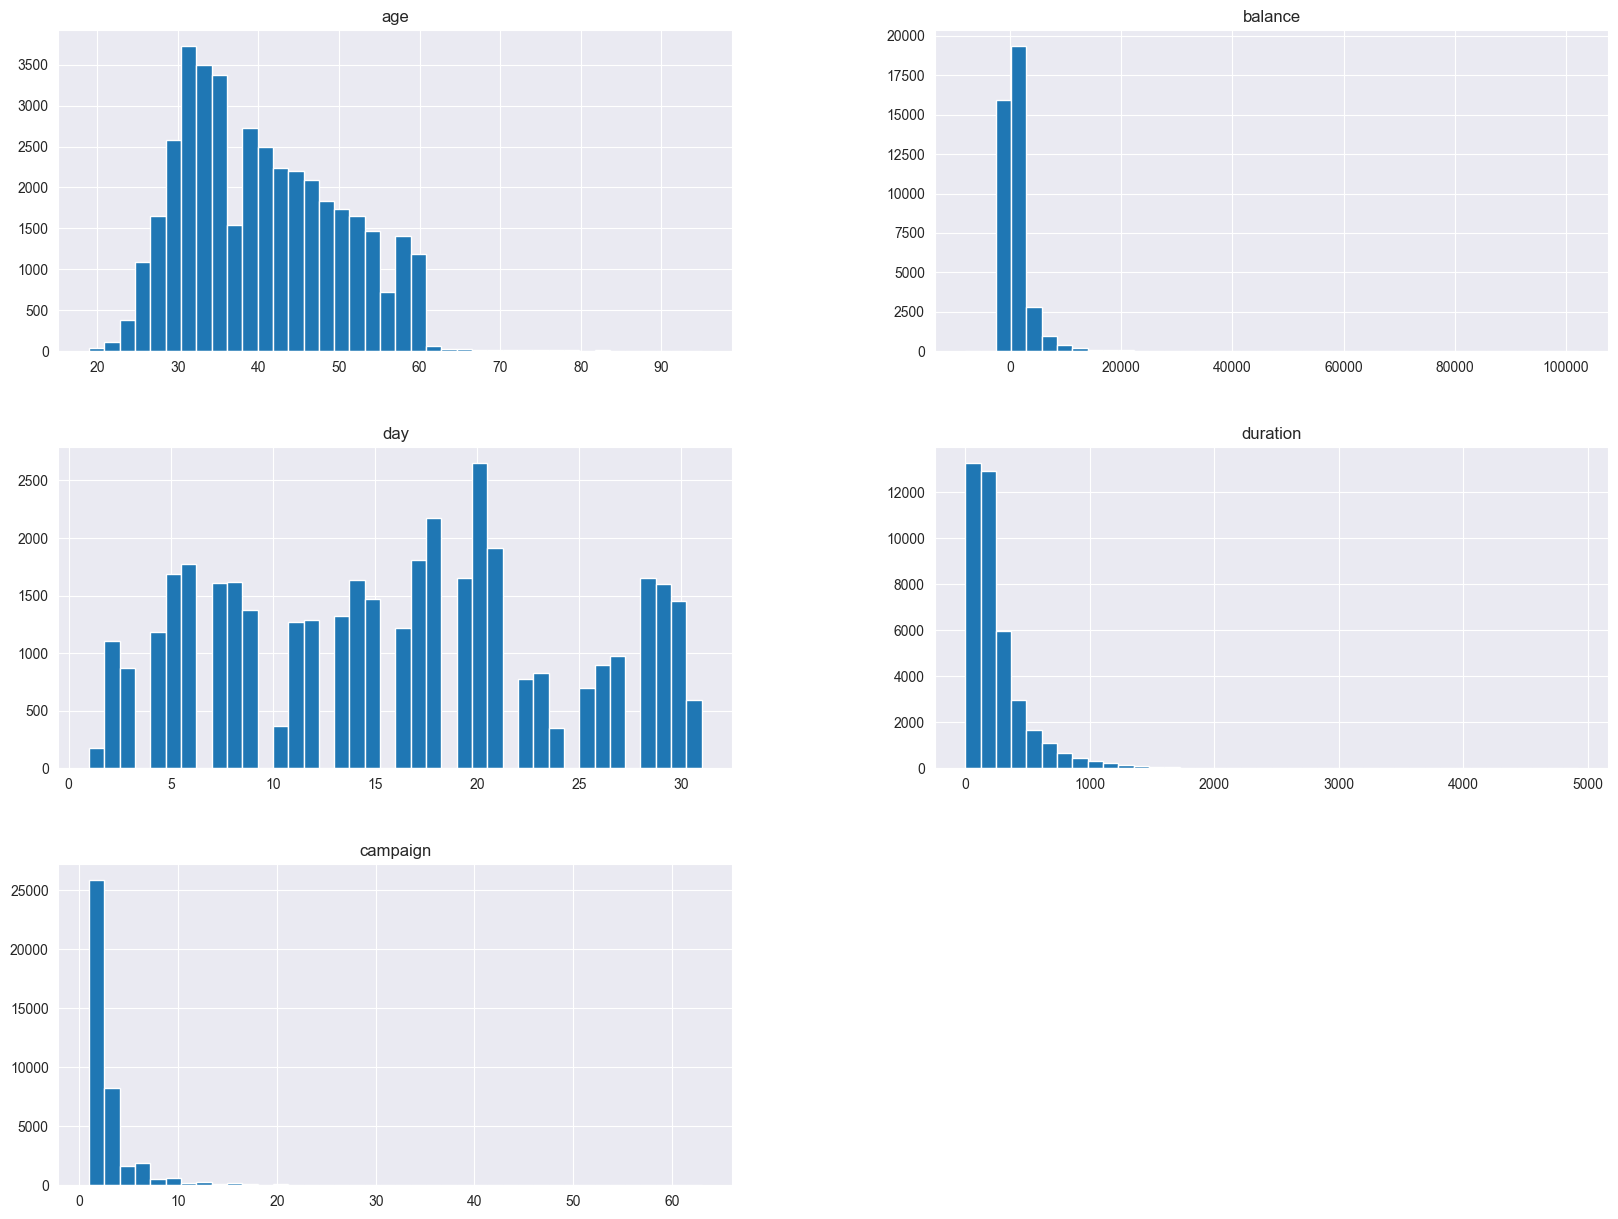

In [6]:
df.hist(bins=40, figsize=(20,15))

In [7]:
# Check for any missing or null values in the dataset
print("\nMissing Values")
print(df.isnull().sum().T)


Missing Values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


Text(0, 0.5, '')

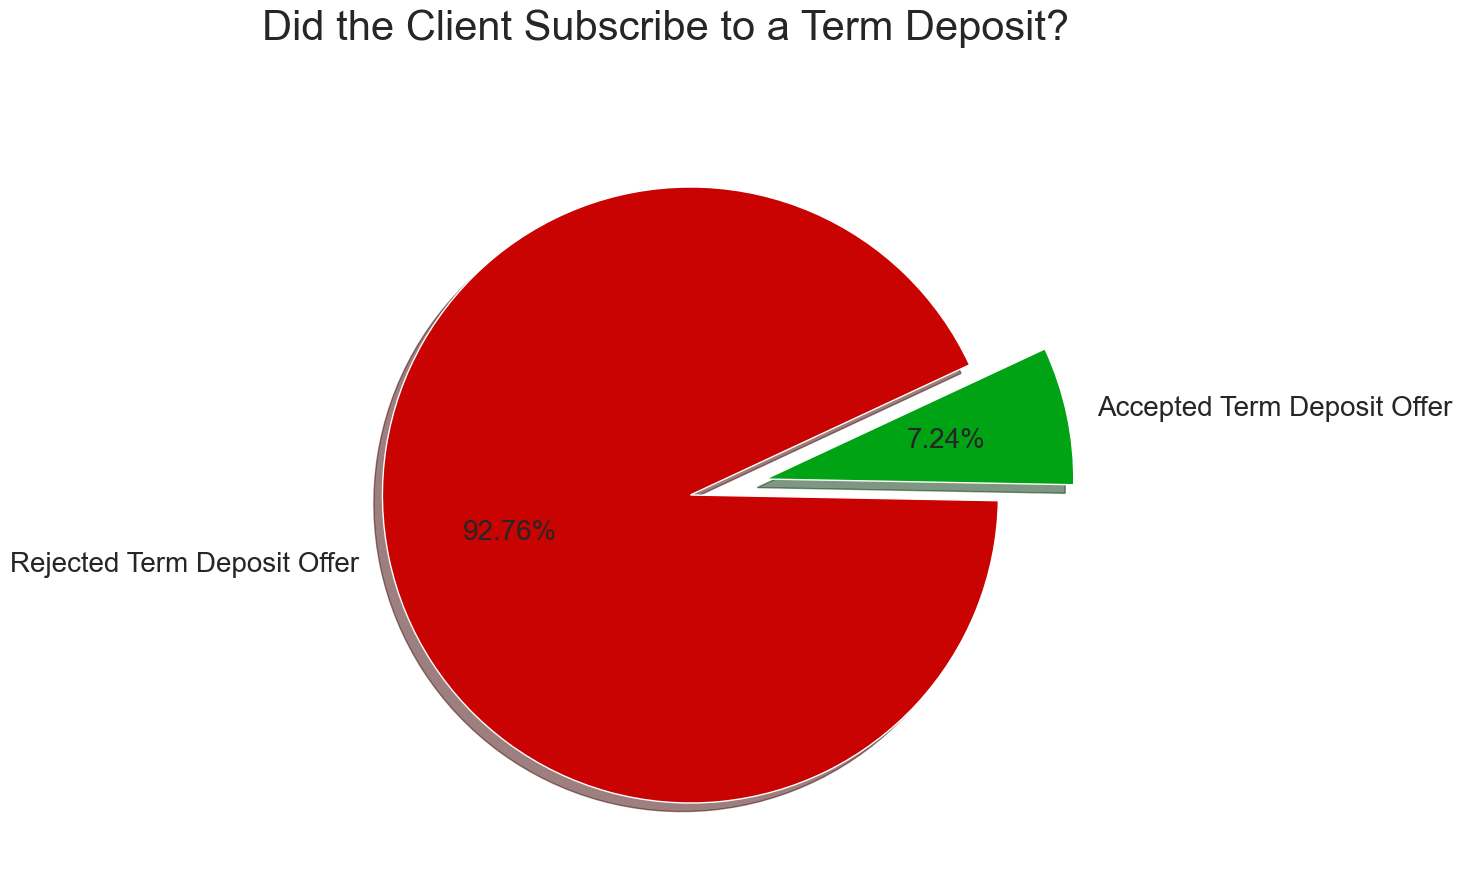

In [8]:
fig, axs = plt.subplots(figsize=(20,10))

colours = ["#c90202", "#00a313"]
labels = "Rejected Term Deposit Offer", "Accepted Term Deposit Offer"

plt.suptitle('Did the Client Subscribe to a Term Deposit?', fontsize=30)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colours, labels=labels, fontsize=20, startangle=25)

axs.set_ylabel('')

# Data Preprocessing

In [9]:
df.replace("unknown", np.nan, inplace=True)

In [10]:
df.isna().sum()

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

In [11]:
#Since contact details of a customer is not a determinant in subscribing to a term deposit offer, we can remove it from the dataframe for simplicity
df = df.drop("contact", axis=1)

#Fill missing values in education and occupation columns with random values
for column in ['education', 'job']:
    # Get a list of unique categories excluding NaN
    categories = df[column].dropna().unique()

    # Apply a function to replace NaN values with a random category
    df[column] = df[column].apply(lambda x: random.choice(categories) if pd.isna(x) else x)

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

# Label Encoding

In [13]:
df_encoded = df.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

#Encoded data frame
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int32
 2   marital    40000 non-null  int32
 3   education  40000 non-null  int32
 4   default    40000 non-null  int32
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int32
 7   loan       40000 non-null  int32
 8   day        40000 non-null  int64
 9   month      40000 non-null  int32
 10  duration   40000 non-null  int64
 11  campaign   40000 non-null  int64
 12  y          40000 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 3.1 MB


# Feature Importance

[0.11182569 0.06693576 0.02588462 0.02619695 0.00384969 0.11353235
 0.01029889 0.00963788 0.11223776 0.09482573 0.35417604 0.07059863]


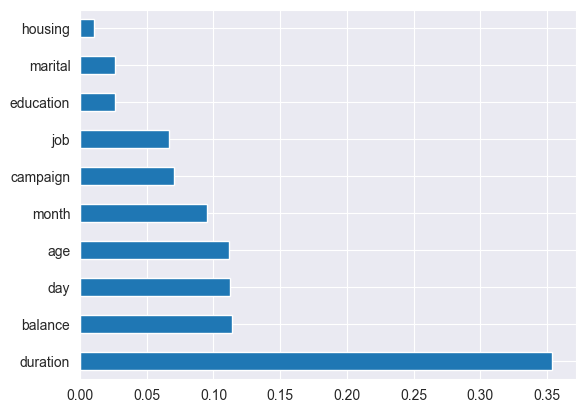

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]
model.fit(X, y)
print(model.feature_importances_)
feat_import = pd.Series(model.feature_importances_, index=X.columns)
feat_import.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
#As we can see from the bar diagram above, duration is the factor contributing the most to a customer's decision on subscribing to a term deposit offer, while housing being contributing the least one.

# Model Training

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
dff = pd.get_dummies(df_encoded, columns=["job", "marital", "education", "month"])
X = dff.drop("y", axis=1)
y = dff["y"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [19]:
def show_roc(model):
    roc_auc = roc_auc_score(y, model.predict(X))

    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()

In [20]:
def model_eval(model, X_train, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    cross = cross_val_score(model, X_test, y_test, cv=5).mean()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

    # Precision-Recall Curve
    precision_array, recall_array, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    PrecisionRecallDisplay(precision=precision_array, recall=recall_array).plot()
    plt.title('2-class Precision-Recall curve')  # Adjusting the title of the plot

    # Printing metrics
    print('Accuracy: {0:0.3f} \nPrecision: {1:0.3f}\nRecall: {2:0.3f} \nF1-Score: {3:0.3f}\n5-Fold Cross Validation: {4:0.3f}'
          .format(acc, precision, recall, f1, cross))

## Logistic Regression

In [21]:
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

Accuracy: 0.868 
Precision: 0.335
Recall: 0.840 
F1-Score: 0.868
5-Fold Cross Validation: 0.935


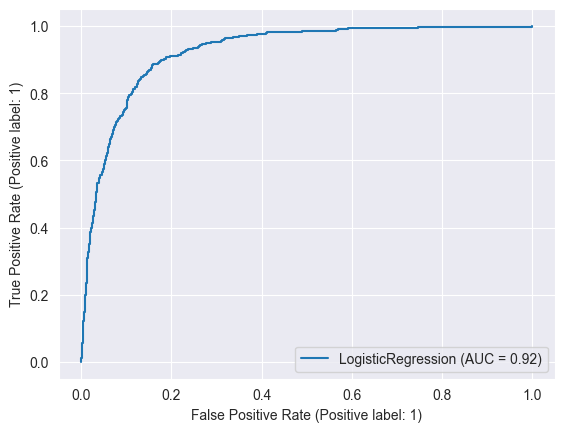

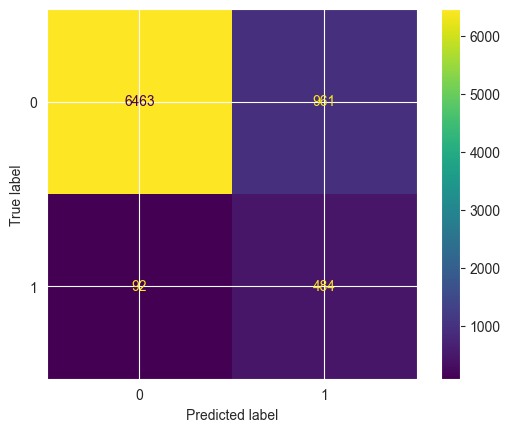

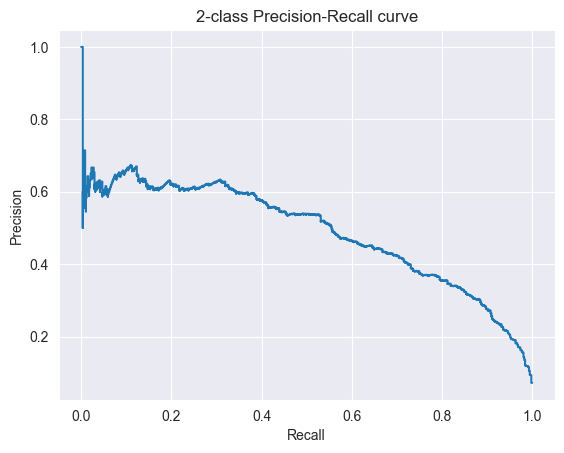

In [22]:
model_eval(log_model, X_train, X_test, y_test, y_pred)

## Gaussian Naive Bayes

In [23]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

Accuracy: 0.175 
Precision: 0.079
Recall: 0.977 
F1-Score: 0.175
5-Fold Cross Validation: 0.778


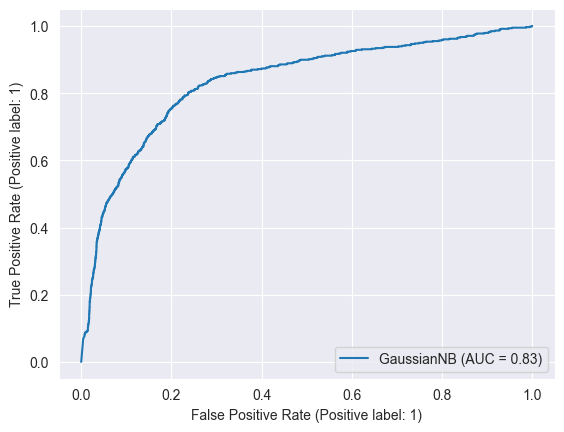

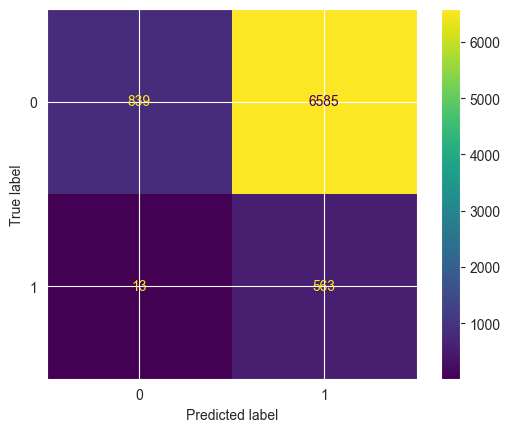

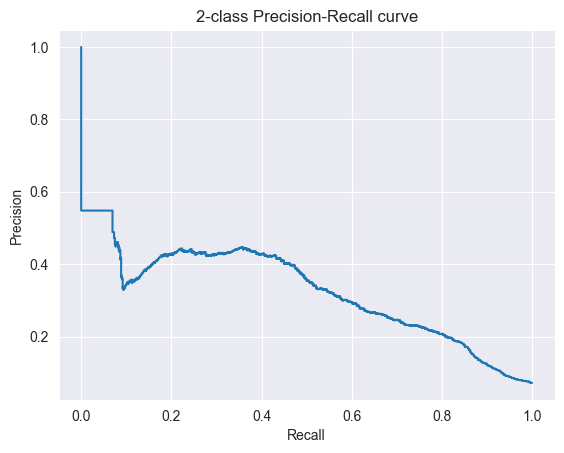

In [24]:
model_eval(nb_model, X_train, X_test, y_test, y_pred)

## K-Nearest Neighbours

In [25]:
knn = KNeighborsClassifier(12)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Accuracy: 0.855 
Precision: 0.294
Recall: 0.726 
F1-Score: 0.855
5-Fold Cross Validation: 0.927


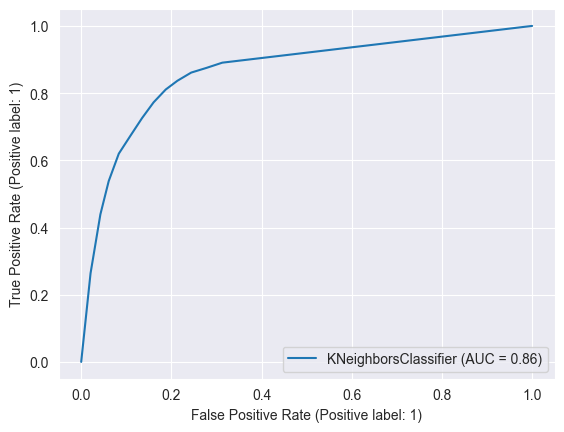

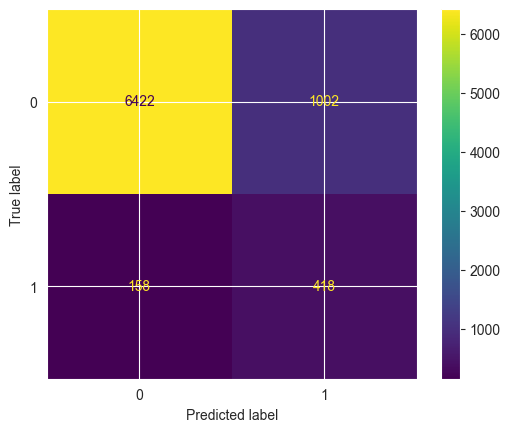

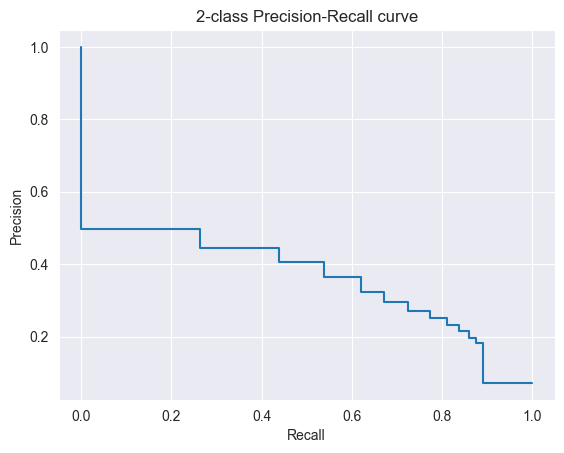

In [26]:
model_eval(knn_model, X_train, X_test, y_test, y_pred)

## RBF Vector Classification

In [27]:
rbf_model = SVC(kernel = "rbf", probability=True)
rbf_model.fit(X_train, y_train)
y_pred = rbf_model.predict(X_test)

Accuracy: 0.880 
Precision: 0.355
Recall: 0.812 
F1-Score: 0.880
5-Fold Cross Validation: 0.932


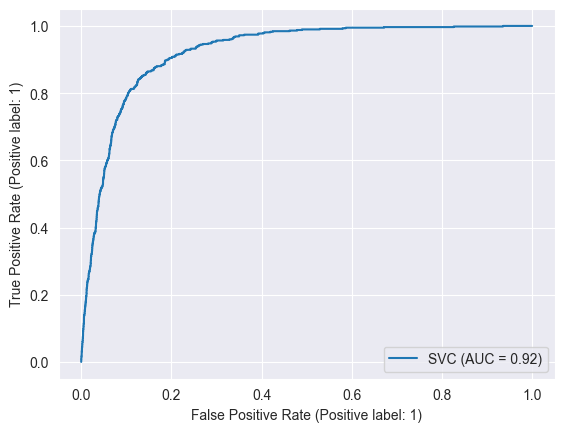

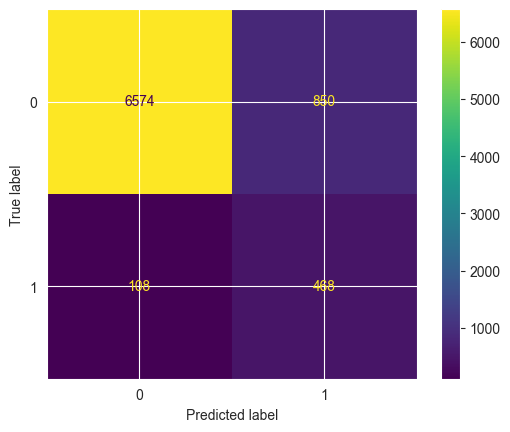

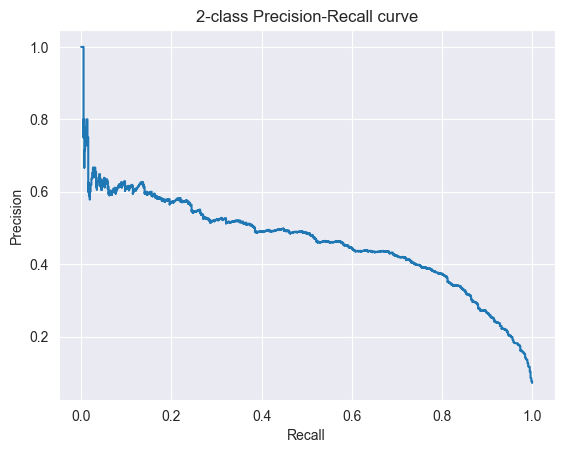

In [28]:
model_eval(rbf_model, X_train, X_test, y_test, y_pred)

## Neural Network

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
mlpc_model = MLPClassifier()
mlpc_model.fit(X_train_scaled, y_train)
y_pred = mlpc_model.predict(X_test_scaled)

Accuracy: 0.906 
Precision: 0.396
Recall: 0.589 
F1-Score: 0.906
5-Fold Cross Validation: 0.926


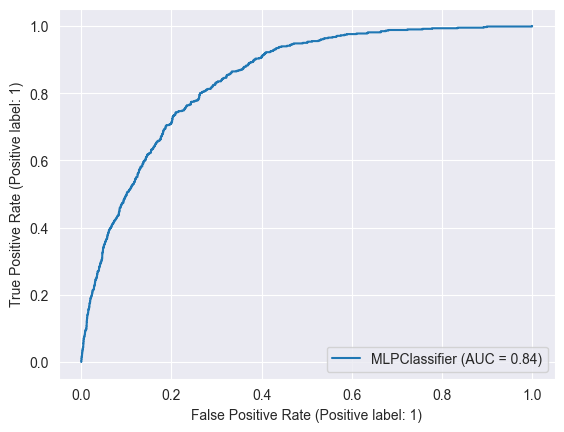

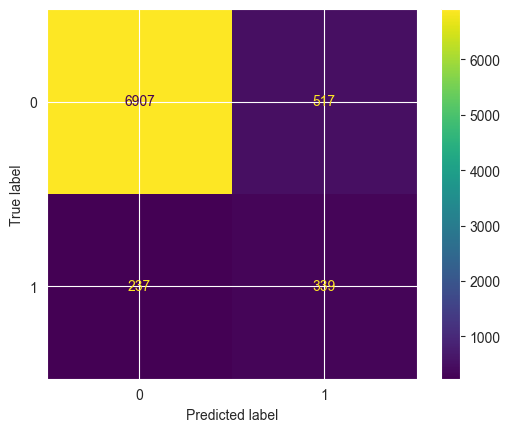

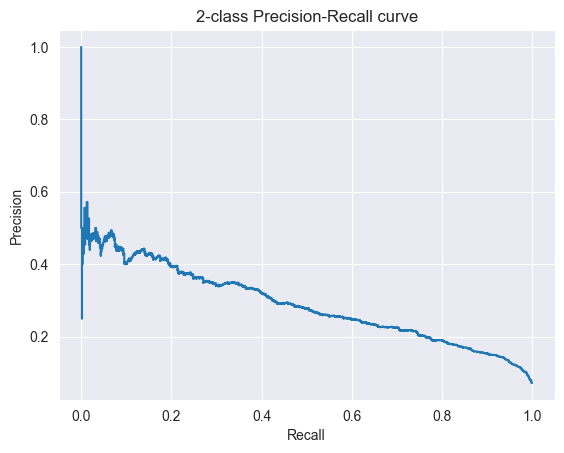

In [31]:
model_eval(mlpc_model, X_train, X_test, y_test, y_pred)

## Classification And Regression Tree

In [32]:
cart_model = tree.DecisionTreeClassifier(max_depth = 2, min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

Accuracy: 0.870 
Precision: 0.323
Recall: 0.738 
F1-Score: 0.870
5-Fold Cross Validation: 0.936


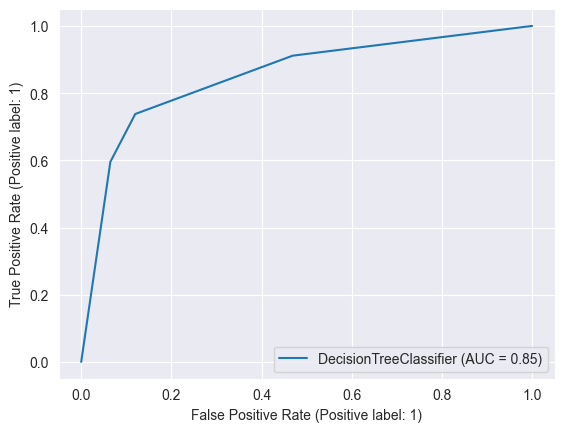

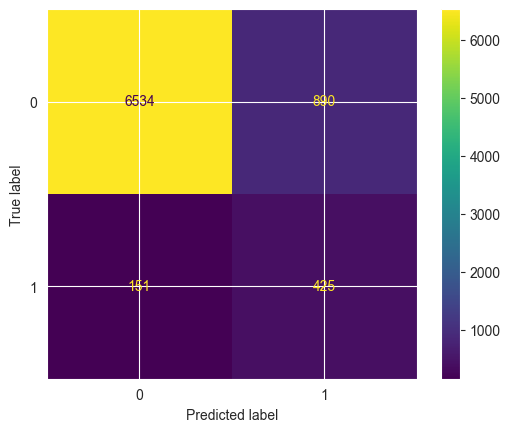

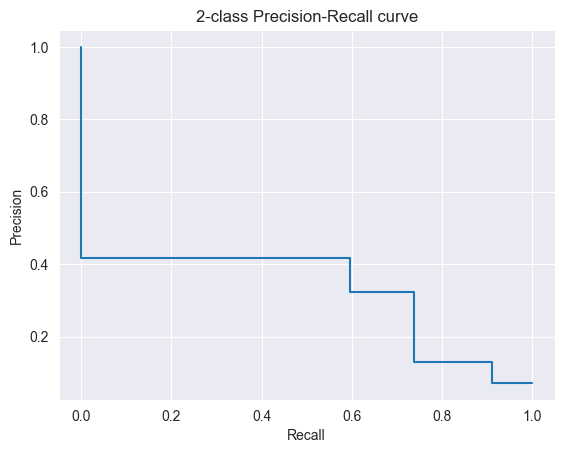

In [33]:
model_eval(cart_model, X_train, X_test, y_test, y_pred)

## Random Forest

In [34]:
rf_model = RandomForestClassifier(max_depth = None,
                                  max_features = 8,
                                  min_samples_leaf = 2,
                                  min_samples_split= 10,
                                  n_estimators = 50)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Accuracy: 0.919 
Precision: 0.455
Recall: 0.655 
F1-Score: 0.919
5-Fold Cross Validation: 0.934


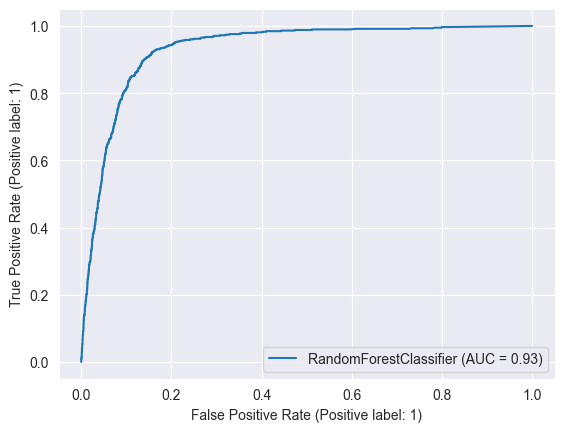

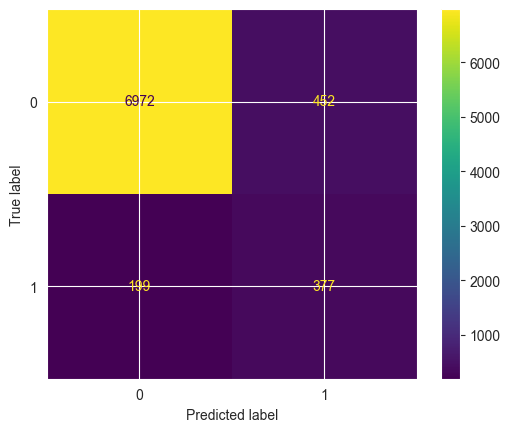

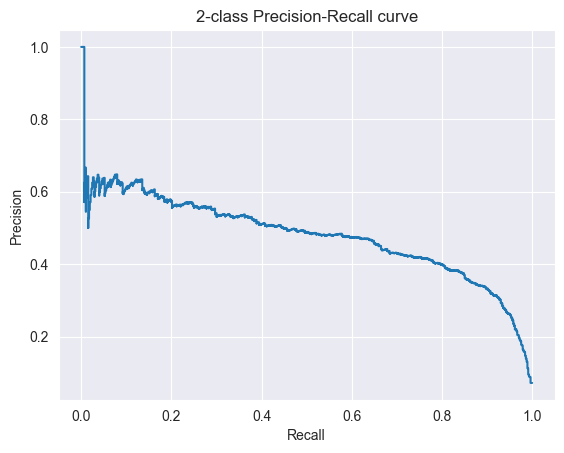

In [35]:
model_eval(rf_model, X_train, X_test, y_test, y_pred)

## Gradient Boosting

In [36]:
gb_model = GradientBoostingClassifier(learning_rate=0.01,
                                      max_depth=3,
                                      min_samples_split=5,
                                      n_estimators=100)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

Accuracy: 0.857 
Precision: 0.308
Recall: 0.793 
F1-Score: 0.857
5-Fold Cross Validation: 0.928


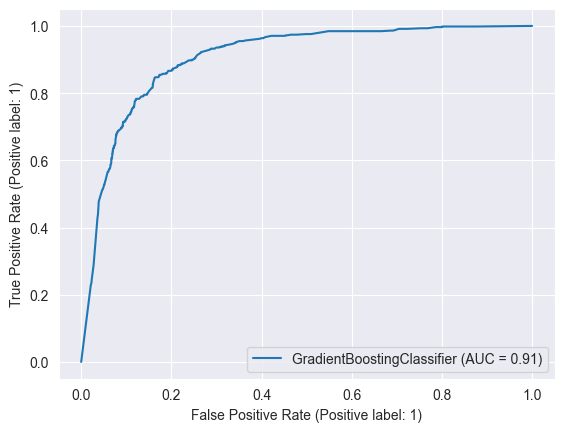

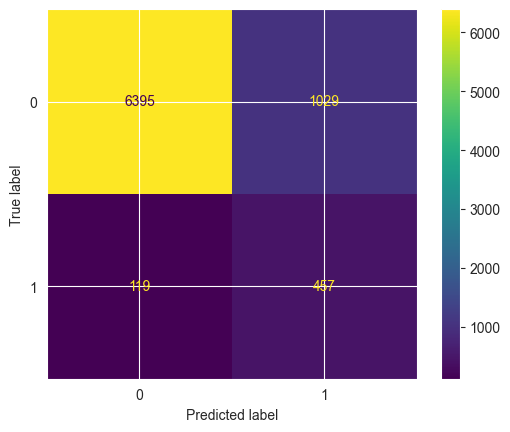

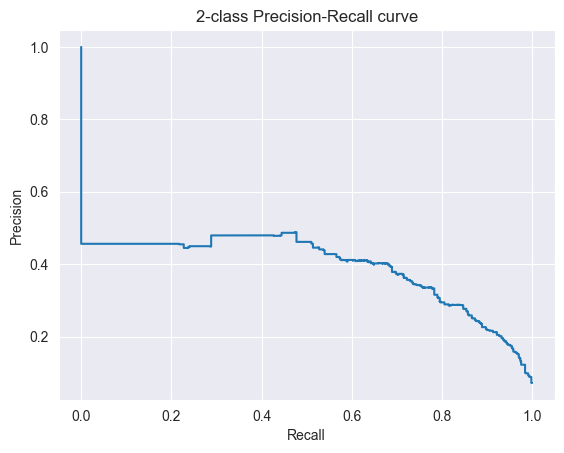

In [37]:
model_eval(gb_model, X_train, X_test, y_test, y_pred)

## XGBoost

In [38]:
xgb_model = XGBClassifier(learning_rate = 0.01,
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

Accuracy: 0.887 
Precision: 0.368
Recall: 0.793 
F1-Score: 0.887
5-Fold Cross Validation: 0.930


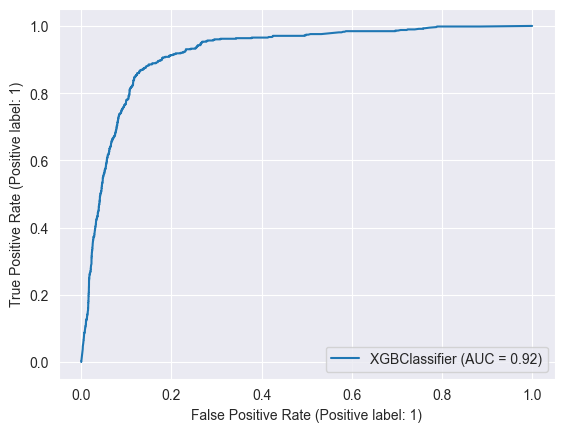

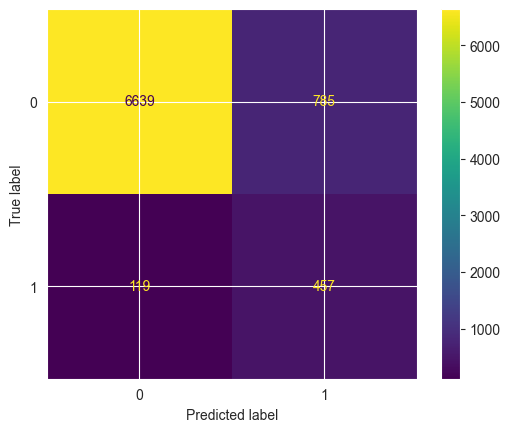

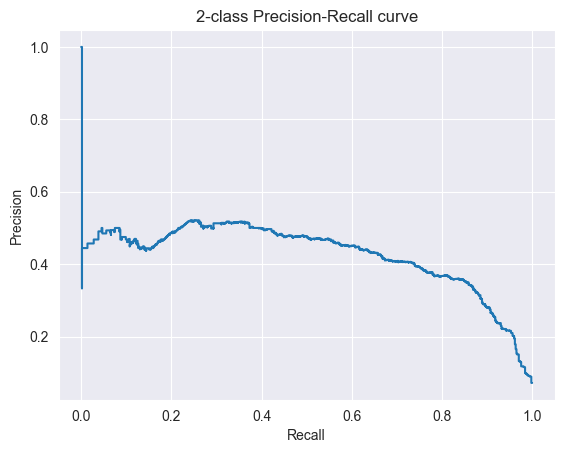

In [39]:
model_eval(xgb_model, X_train, X_test, y_test, y_pred)

## CatBoost

In [40]:
cb_model = CatBoostClassifier(iterations = 200,
                                learning_rate = 0.05,
                                depth = 5,
                                verbose=False)

cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)

Accuracy: 0.920 
Precision: 0.464
Recall: 0.731 
F1-Score: 0.920
5-Fold Cross Validation: 0.936


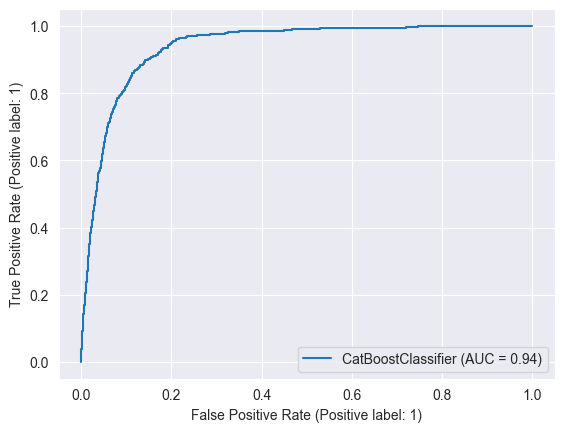

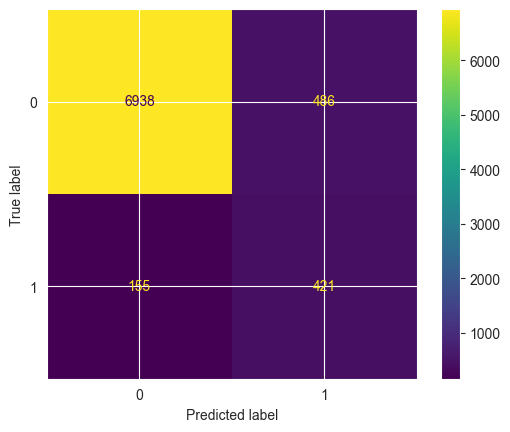

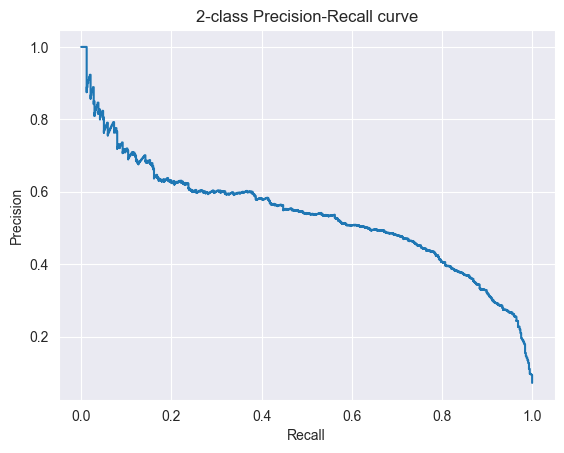

In [41]:
model_eval(cb_model, X_train, X_test, y_test, y_pred)

## Model Benchmarking

In [42]:
models = [
    log_model,
    nb_model,
    knn_model,
    rbf_model,
    mlpc_model,
    cart_model,
    rf_model,
    gb_model,
    xgb_model,
    cb_model
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.2%}".format(acc))

----------------------------
LogisticRegression:
Accuracy: 86.84%
----------------------------
GaussianNB:
Accuracy: 17.52%
----------------------------
KNeighborsClassifier:
Accuracy: 85.50%
----------------------------
SVC:
Accuracy: 88.02%
----------------------------
MLPClassifier:
Accuracy: 76.50%
----------------------------
DecisionTreeClassifier:
Accuracy: 86.99%
----------------------------
RandomForestClassifier:
Accuracy: 91.86%
----------------------------
GradientBoostingClassifier:
Accuracy: 85.65%
----------------------------
XGBClassifier:
Accuracy: 88.70%
----------------------------
CatBoostClassifier:
Accuracy: 91.99%


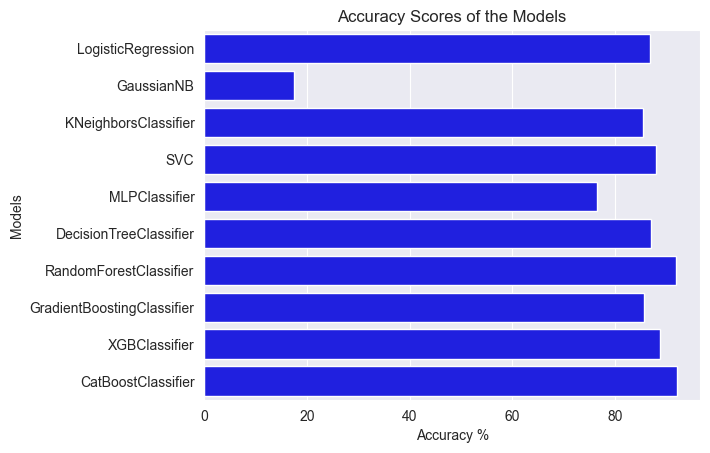

In [43]:
results = []

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc * 100])

results_df = pd.DataFrame(results, columns=["Models", "Accuracy Scores"])

sns.barplot(x='Accuracy Scores', y='Models', data=results_df, color="b")
plt.xlabel('Accuracy %')
plt.title('Accuracy Scores of the Models')
plt.show()

In [44]:
sorted_results_df = results_df.sort_values(by="Accuracy Scores", ascending=False, ignore_index=True)
sorted_results_df.index = sorted_results_df.index + 1
sorted_results_df

,Models,Accuracy Scores
1,CatBoostClassifier,91.9875
2,RandomForestClassifier,91.8625
3,XGBClassifier,88.7000
4,SVC,88.0250
5,DecisionTreeClassifier,86.9875
6,LogisticRegression,86.8375
7,GradientBoostingClassifier,85.6500
8,KNeighborsClassifier,85.5000
9,MLPClassifier,76.5000
10,GaussianNB,17.5250
